In [2]:
from collections import Counter
from sklearn.datasets import make_classification

In [6]:
X, y = make_classification(n_samples=1000, n_features=6, n_informative = 3, n_classes = 2, random_state = 1)
print(X.shape, y.shape)
print(Counter(y))

(1000, 6) (1000,)
Counter({1: 500, 0: 500})


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [10]:
# define the model evaluation procedure
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [11]:
# evaluate the model and collect the scores
from sklearn.model_selection import cross_val_score
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [12]:
# report the model performance
from numpy import mean
from numpy import std
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.890 (0.034)


In [13]:
model.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [14]:
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223]


In [15]:
# predict the class label
yhat = model.predict([row])

In [17]:
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [19]:
from matplotlib import pyplot

>0.0000 0.777 (0.037)
>0.0001 0.683 (0.049)
>0.0010 0.762 (0.044)
>0.0100 0.775 (0.040)
>0.1000 0.774 (0.038)
>1.0000 0.777 (0.037)


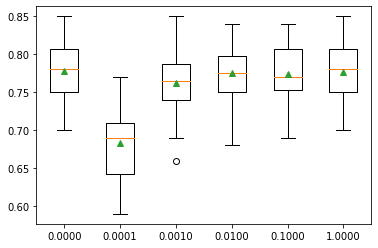

In [21]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()